In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("superstore_cleaned.csv", engine='c')
df.shape
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'delivery_days', 'unit_price'],
      dtype='object')

rename column headers and remove spaces and lowercase

In [102]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

remove duplicates

In [103]:
df.drop_duplicates(inplace=True)

fix date columns    

In [104]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

delivery days

In [105]:
df['delivery_days'] = (df['ship_date']-df['order_date']).dt.days

sales per unit

In [106]:
df['unit_price'] = df['sales']/df['quantity']


handling missing values

In [107]:
df.isnull().sum()
df['customer_name'].fillna('Unknown',inplace=True)
df['region'].fillna('Unknown',inplace=True)
df.dropna(subset=['order_date','ship_date','sales'],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2824\3942006585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_name'].fillna('Unknown',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2824\3942006585.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

remove extra spaces

In [108]:
df['category'] = df['category'].str.title().str.strip()
df['region'] = df['region'].str.title().str.strip()
df['segment'] = df['segment'].str.title().str.strip()

converting a clean CSV file

1.CALCULATION OF TOTAL PROFIT and total sales

In [109]:
total_profit = df["profit"].sum() #for sum of total profit
total_sales = df['sales'].sum() # for sum of total sales
print(f'Total_profit: ${total_profit:,.2f}')
print(f'total_sales: ${total_sales:,.2f}')

Total_profit: $286,397.02
total_sales: $2,297,200.86


2.most profitable  category 

In [110]:
category_profit = df.groupby('category')['profit'].sum().sort_values(ascending=False).head(1)
print(f'Most profitable category :{category_profit}')

Most profitable category :category
Technology    145454.9481
Name: profit, dtype: float64


3.which region generate the most revenue

In [111]:
# Group by region, sum profit, and get the most profitable region
category_profit_region = df.groupby('region')['profit'].sum().sort_values(ascending=False).head(1)

# Print with proper formatting
print("Most Profitable Region:")
print(category_profit_region)


Most Profitable Region:
region
West    108418.4489
Name: profit, dtype: float64


4.who are the top 10 customers by sales

In [112]:
# Group by customer name and get top 10 by sales
top10_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)

print("Top 10 Customers by Sales:")
print(top10_customers)


Top 10 Customers by Sales:
customer_name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: sales, dtype: float64


5.Which month has highest and lowest sales

In [113]:
# Convert 'order_date' to datetime 
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year-month for grouping
df['YearMonth'] = df['order_date'].dt.to_period('M')

# Group by Year-Month and sum sales
monthly_sales = df.groupby('YearMonth')['sales'].sum()

# Find highest and lowest sales
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()
max_value = monthly_sales.max()
min_value = monthly_sales.min()

print(f"📈 Highest Sales: {max_value:.2f} in {max_month}")
print(f"📉 Lowest Sales: {min_value:.2f} in {min_month}")


📈 Highest Sales: 118447.82 in 2017-11
📉 Lowest Sales: 4519.89 in 2014-02


6.Are there  products that are sold in high volume but low profit

In [114]:
# Step 1: Group by product_name and calculate total sales and profit
sales_profit = df.groupby('product_name')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

# Step 2: Sort by sales descending
sales_profit_sorted = sales_profit.sort_values(by='profit', ascending=True)

# Step 3: Get the top 1 product
top_product = sales_profit_sorted.head(1)

# Display result
print(top_product)


                                               sales     profit
product_name                                                   
Cubify CubeX 3D Printer Double Head Print  11099.963 -8879.9704


7.what is the average delivery time

In [115]:
# Make sure dates are in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Calculate delivery time in days
df['delivery_time'] = (df['ship_date'] - df['order_date']).dt.days

# Calculate average delivery time
average_delivery_time = df['delivery_time'].mean()

print(f"Average delivery time: {average_delivery_time:.2f} days")


Average delivery time: 3.96 days


8.Sales by Category (Bar Chart)

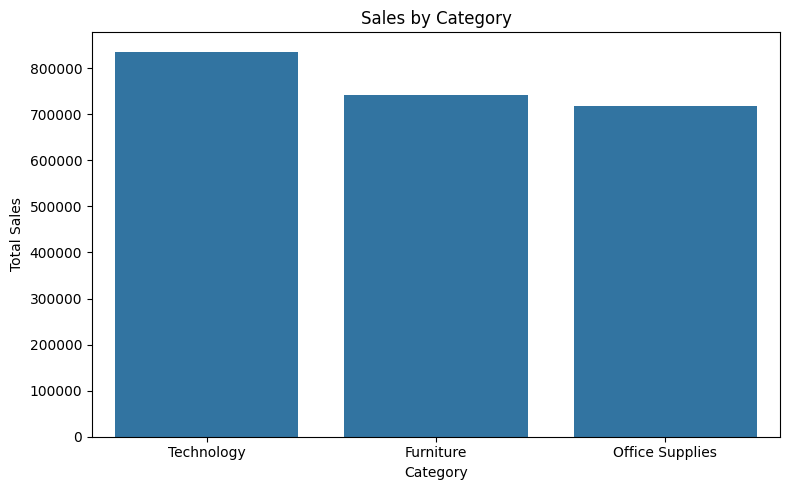

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping sales by category
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


9.Profit by Region (Pie Chart or Map)

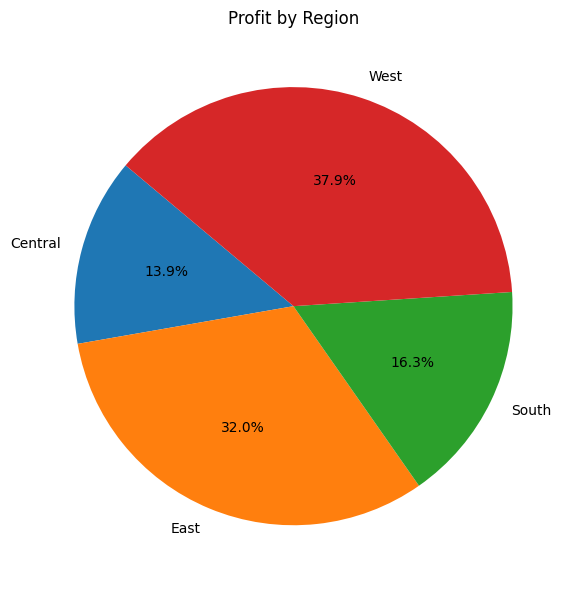

In [117]:
profit_by_region = df.groupby('region')['profit'].sum()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(profit_by_region, labels=profit_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit by Region')
plt.tight_layout()
plt.show()


10.Monthly Sales Trend (Line Chart)

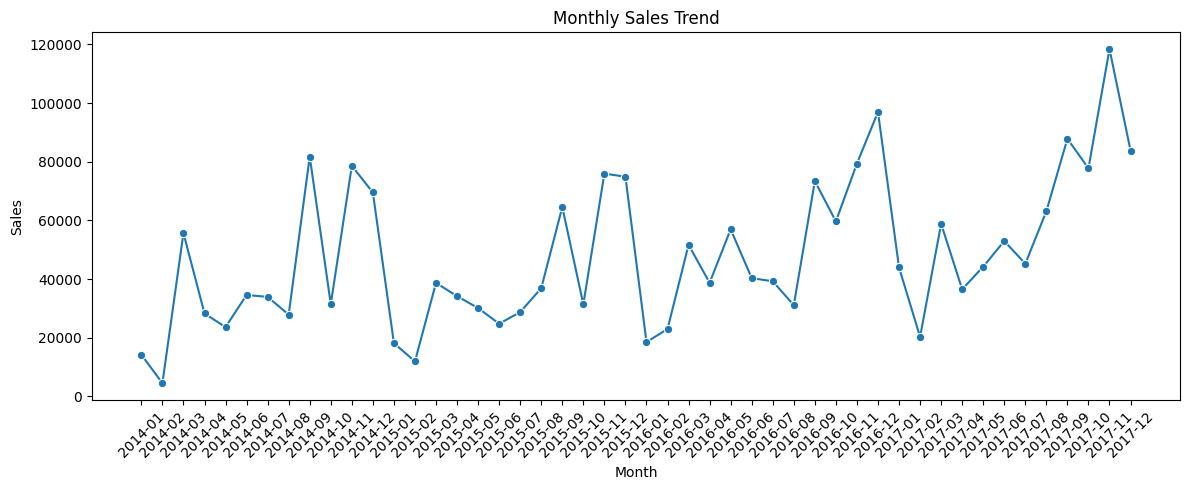

In [118]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year-month and group sales
df['YearMonth'] = df['order_date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('YearMonth')['sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='YearMonth', y='sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


11.Top 10 Products by Profit (Bar Chart)

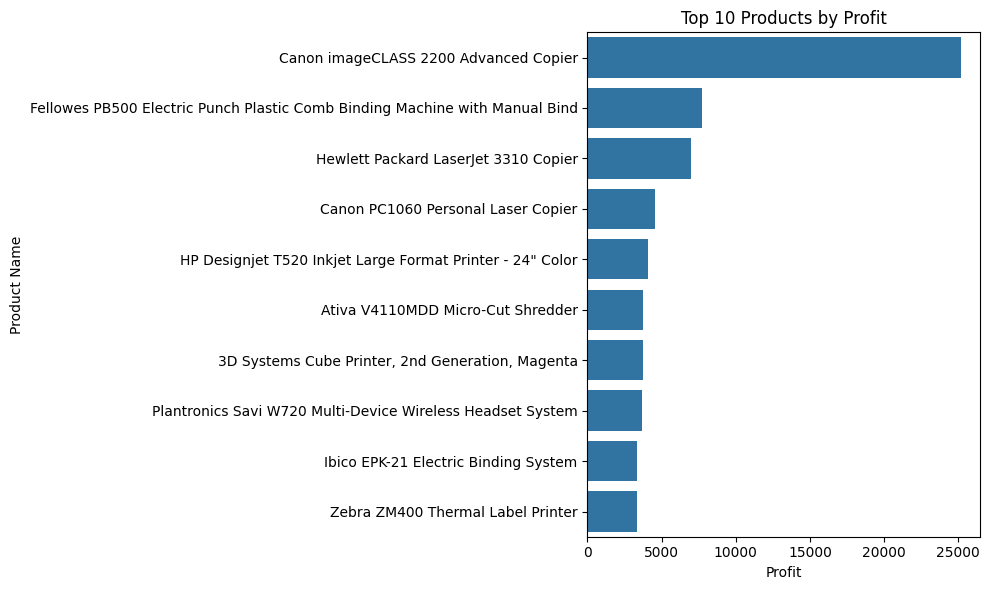

In [119]:
top10_products_profit = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_products_profit.values, y=top10_products_profit.index)
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()
